In [11]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df=pd.read_csv('student_addiction.csv')

In [13]:
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [14]:
df.shape

(705, 13)

In [15]:
df.isnull().sum()

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

In [16]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [17]:
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [18]:
df['Most_Used_Platform'].value_counts()


Most_Used_Platform
Instagram    249
TikTok       154
Facebook     123
WhatsApp      54
Twitter       30
LinkedIn      21
WeChat        15
Snapchat      13
LINE          12
KakaoTalk     12
VKontakte     12
YouTube       10
Name: count, dtype: int64

In [19]:
num_features=[feature for feature in df.columns if df[feature].dtype!='O']
cat_features=[feature for feature in df.columns if df[feature].dtype=='O']


<Axes: >

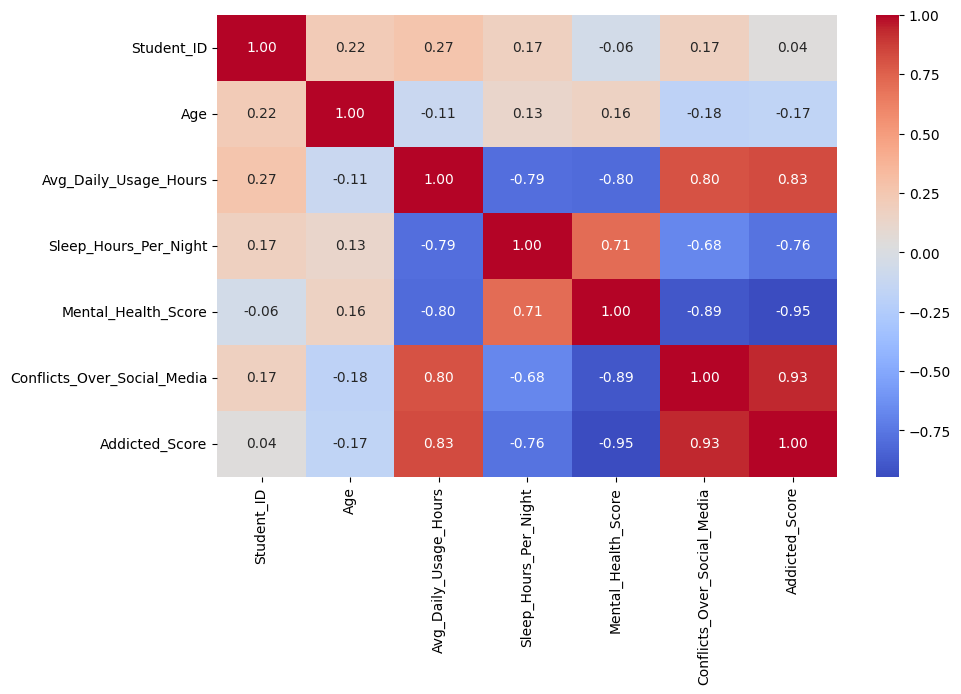

In [20]:
df_num=pd.DataFrame(data=df,columns=num_features)
plt.figure(figsize=[10,6])
sns.heatmap(data=df_num.corr(),annot=True, fmt=".2f",cmap='coolwarm')


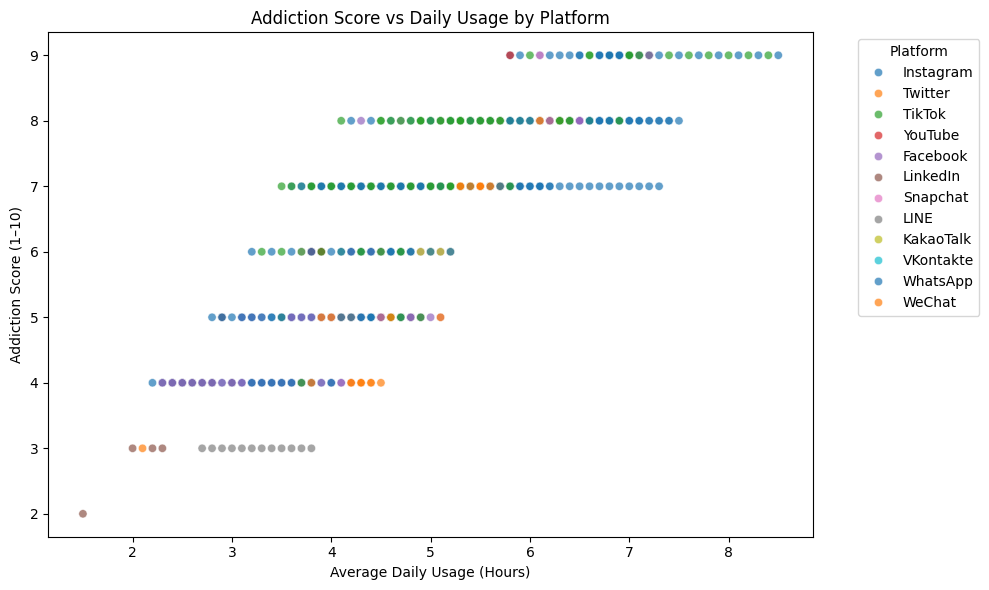

In [21]:
plt.figure(figsize=(10, 6))  # Set figure size BEFORE plotting

fig = sns.scatterplot(
    x='Avg_Daily_Usage_Hours',
    y='Addicted_Score',
    hue='Most_Used_Platform',
    data=df,
    palette='tab10', # Optional: nice color palette
    alpha=0.7         # Optional: slightly transparent points
)

plt.title("Addiction Score vs Daily Usage by Platform")
plt.xlabel("Average Daily Usage (Hours)")
plt.ylabel("Addiction Score (1–10)")
plt.legend(title="Platform", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

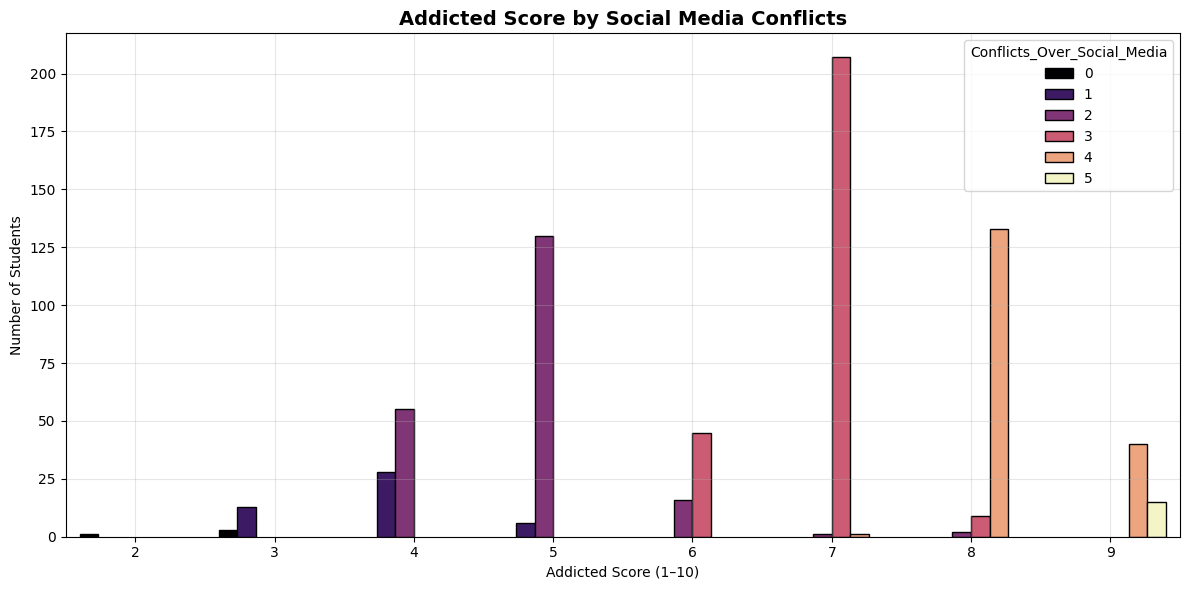

In [22]:
plt.figure(figsize=(12, 6))

sns.countplot(
    data=df,
    x='Addicted_Score',
    hue='Conflicts_Over_Social_Media',
    palette='magma',
    edgecolor='black'
)

plt.title("Addicted Score by Social Media Conflicts", fontsize=14, weight='bold')
plt.xlabel("Addicted Score (1–10)")
plt.ylabel("Number of Students")

plt.tight_layout()
plt.grid(True, linestyle='-', alpha=0.3)
plt.show()

C:\Users\ANIKET NAINWAL\AppData\Local\Temp\ipykernel_20884\342424184.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


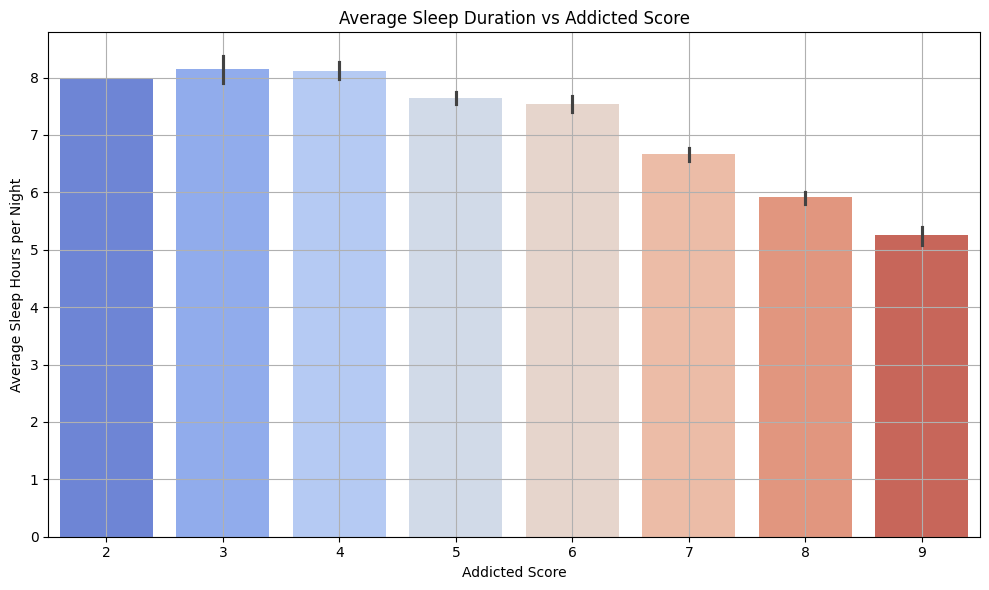

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x='Addicted_Score',
    y='Sleep_Hours_Per_Night',

    palette='coolwarm'
)

plt.title("Average Sleep Duration vs Addicted Score")
plt.xlabel("Addicted Score")
plt.ylabel("Average Sleep Hours per Night")
plt.grid(True)
plt.tight_layout()
plt.show()


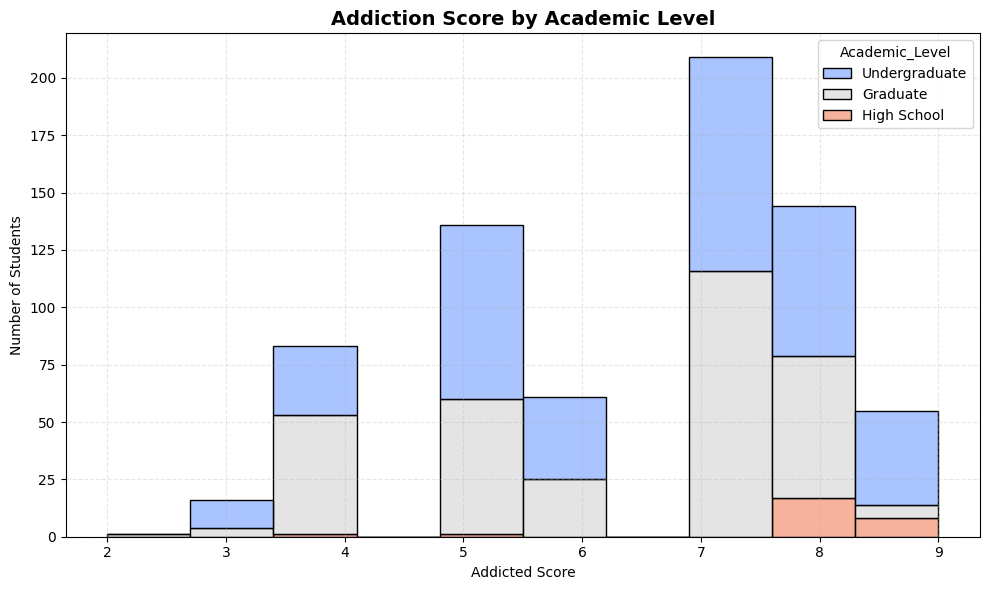

In [24]:

plt.figure(figsize=(10, 6))

plot = sns.histplot(
    data=df,
    x='Addicted_Score',
    bins=10,
    hue='Academic_Level',
    multiple='stack',
    palette='coolwarm',
    edgecolor='black'
)

plt.title("Addiction Score by Academic Level", fontsize=14, weight='bold')
plt.xlabel("Addicted Score")
plt.ylabel("Number of Students")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [25]:

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
import warnings
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


In [26]:
df=df.drop('Student_ID',axis=1)

In [27]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X


,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media
0,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3
1,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0
2,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4
3,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1
4,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2
...,...,...,...,...,...,...,...,...,...,...,...
700,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2
701,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5
702,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3
703,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2


In [28]:
num_feat=X.select_dtypes(exclude='object').columns
cat_feat=X.select_dtypes(include='object').columns
print(len(num_feat),len(cat_feat))

5 6


In [29]:
num_trans=StandardScaler()
cat_trans=OneHotEncoder()
preprocessor=ColumnTransformer(
     transformers =[('numerical',num_trans,num_feat)
                  ,
    ('categorical',cat_trans,cat_feat)],
     remainder='passthrough'
)

In [30]:
X=preprocessor.fit_transform(X)

In [41]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1551 stored elements and shape (141, 137)>
  Coords	Values
  (0, 0)	-0.471722782417474
  (0, 1)	-1.52703516532473
  (0, 2)	1.8925150097815617
  (0, 3)	0.7000539747632586
  (0, 4)	-0.8875544930966774
  (0, 5)	1.0
  (0, 9)	1.0
  (0, 41)	1.0
  (0, 121)	1.0
  (0, 132)	1.0
  (0, 135)	1.0
  (1, 0)	-1.186915388018159
  (1, 1)	-0.09448720583845635
  (1, 2)	-1.038086807482019
  (1, 3)	-0.20552043295802125
  (1, 4)	0.15706306555634025
  (1, 5)	1.0
  (1, 9)	1.0
  (1, 17)	1.0
  (1, 126)	1.0
  (1, 133)	1.0
  (1, 136)	1.0
  (2, 0)	0.958662428783896
  (2, 1)	-1.6066211630739675
  (2, 2)	0.11639269628848238
  :	:
  (138, 126)	1.0
  (138, 133)	1.0
  (138, 136)	1.0
  (139, 0)	-1.186915388018159
  (139, 1)	-0.5720031923338806
  (139, 2)	0.5604232746617522
  (139, 3)	1.6056283824845383
  (139, 4)	-0.8875544930966774
  (139, 5)	1.0
  (139, 9)	1.0
  (139, 56)	1.0
  (139, 127)	1.0
  (139, 132)	1.0
  (139, 136)	1.0
  (140, 0)	-0.471722782417474
  (

In [32]:
def evaluate(true,predicted):
    
    r2_square=r2_score(true,predicted)
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)

    
    print("Various metrics for the model are:")
    print("R2 score : ",r2_square)
    print("Mean Absolute Error (MAE) : ",mae)
    print("Mean Squared Error (MSE) : ",mse)

In [33]:
models=[
 ('RandomForest',RandomForestRegressor()) ,
 ('Adaboost',AdaBoostRegressor()),
 ('XGBoost',XGBRegressor()),
 ('Linear Regression',LinearRegression()),
 ('Lasso',Lasso()),
 ('Ridge',Ridge()),
]

param_grid = {
    'RandomForest': {
                     'n_estimators': [10, 50, 100, 200],
                     'max_depth': [3, 5, 10, 20]
                     },
    'Adaboost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    'Linear Regression': {
        # No hyperparameters to tune for basic LinearRegression
    },
    'Lasso': {
        'alpha': [0.01, 0.1, 1.0, 10]
    },
    'Ridge': {
        'alpha': [0.01, 0.1, 1.0, 10]
    }
}

# Dictionary to store best results
best_models = {}

# Perform GridSearchCV
for name, model in models:
    print(f"\n🔍 Tuning {name}...")
    if name in param_grid and param_grid[name]:
        grid = GridSearchCV(model, param_grid[name], cv=5, scoring='r2', n_jobs=-1)
        grid.fit(X_train, y_train)
        best_models[name] = {
            'best_score': grid.best_score_,
            'best_params': grid.best_params_,
            'best_estimator': grid.best_estimator_
        }
    else:
        # Fit directly for models with no hyperparameters
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        best_models[name] = {
            'best_score': score,
            'best_params': 'Default',
            'best_estimator': model
        }



🔍 Tuning RandomForest...

🔍 Tuning Adaboost...

🔍 Tuning XGBoost...

🔍 Tuning Linear Regression...

🔍 Tuning Lasso...

🔍 Tuning Ridge...


In [34]:
best_model_name = max(best_models, key=lambda x: best_models[x]['best_score'])
best_model = best_models[best_model_name]['best_estimator']
best_score = best_models[best_model_name]['best_score']


In [35]:
print(f"🏆 Best Model: {best_model_name}")
print(f"📈 R² Score: {best_score:.4f}")


🏆 Best Model: XGBoost
📈 R² Score: 0.9871


In [36]:
y_pred=best_model.predict(X_test)

In [37]:
evaluate(y_test,y_pred)

Various metrics for the model are:
R2 score :  0.98532634973526
Mean Absolute Error (MAE) :  0.05345869909787009
Mean Squared Error (MSE) :  0.03671773142756623
